In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
df_dict_tuber = {}
for i in range(13):
    if i<9:
        df_dict_tuber[i+1] = pd.read_csv(f'./data/csv/kmers_count_tuber/estimatekmerscount_mytuber0{i+1}.csv', sep = "\t", index_col = '#Path')
    else:
        df_dict_tuber[i+1] = pd.read_csv(f'./data/csv/kmers_count_tuber/estimatekmerscount_mytuber{i+1}.csv', sep = "\t", index_col = '#Path')

    df_dict_tuber[i+1]['Size (est.)'] = df_dict_tuber[i+1]['Size (est.)'].astype(np.int64)

In [3]:
df_compressed_size = pd.read_csv("./data/csv/661k_compressed_size.csv",header=None, sep = "\t", names = ['size_Mb','name'], index_col = 'name')
df_compressed_size = df_compressed_size.drop('./_md5.txt')
df_compressed_size = df_compressed_size.drop('total')
data_tuber = df_compressed_size[df_compressed_size.index.str.contains('mycobacterium_tuberculosis')] 
data_tuber

,size_Mb
name,
./mycobacterium_tuberculosis__01.tar.xz,89
./mycobacterium_tuberculosis__02.tar.xz,58
./mycobacterium_tuberculosis__03.tar.xz,146
./mycobacterium_tuberculosis__04.tar.xz,81
./mycobacterium_tuberculosis__05.tar.xz,76
./mycobacterium_tuberculosis__06.tar.xz,90
./mycobacterium_tuberculosis__07.tar.xz,160
./mycobacterium_tuberculosis__08.tar.xz,111
./mycobacterium_tuberculosis__09.tar.xz,45


In [4]:
kmers_count_sum = [df.sum().values[0] for df in df_dict_tuber.values()]
kmers_count_sum

[17264195687,
 17334068525,
 17795050225,
 17426788455,
 17433070160,
 17433715332,
 18102025065,
 17550992255,
 17248066306,
 17679965608,
 17361419731,
 17508823378,
 3395636452]

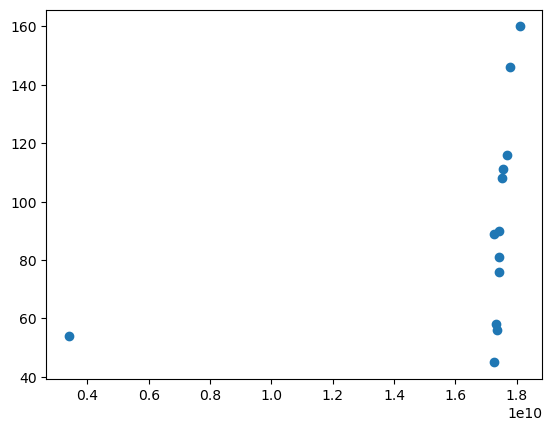

In [5]:
plt.scatter(kmers_count_sum, data_tuber['size_Mb'].values)
plt.show()
# remove batch 13 since it is an outlier

Text(0.5, 1.0, 'total kmers count and compressed size')

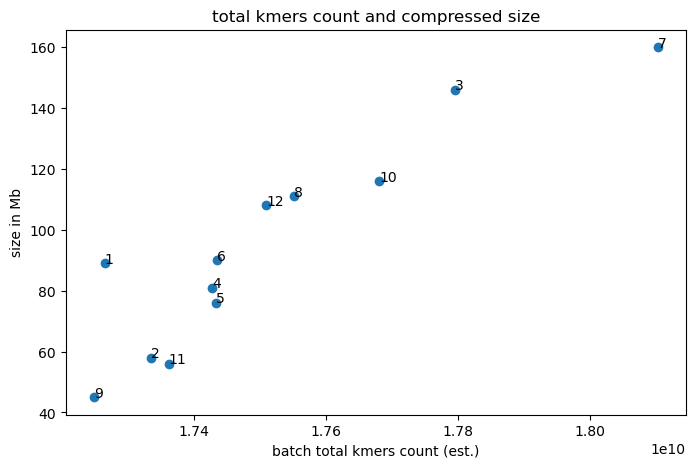

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
x = kmers_count_sum[:12]
y = data_tuber['size_Mb'].values[:12]
ax.scatter(x, y)
labels = range(1,13)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('size in Mb')
ax.set_xlabel('batch total kmers count (est.)')
ax.set_title('total kmers count and compressed size')

In [7]:
kmers_count_mean = [df.mean().values[0] for df in df_dict_tuber.values()]
kmers_count_mean

[4316048.92175,
 4333517.13125,
 4448762.55625,
 4356697.11375,
 4358267.54,
 4358428.833,
 4525506.26625,
 4387748.06375,
 4312016.5765,
 4419991.402,
 4340354.93275,
 4377205.8445,
 4670751.653370013]

Text(0.5, 1.0, 'mean kmers count and compressed size')

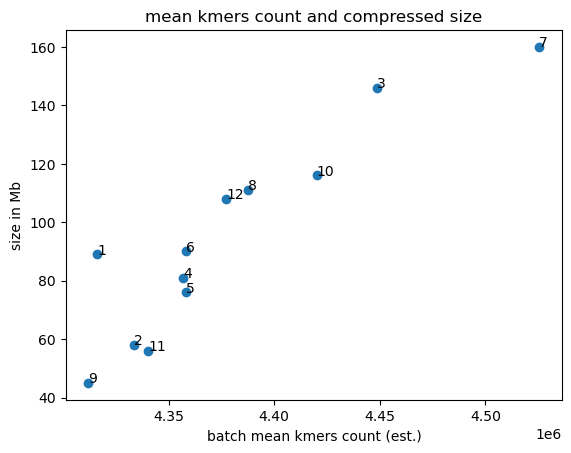

In [8]:
fig, ax = plt.subplots()
x = kmers_count_mean[:12]
y = data_tuber['size_Mb'].values[:12]
ax.scatter(x, y)
labels = range(1,13)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

ax.set_ylabel('size in Mb')
ax.set_xlabel('batch mean kmers count (est.)')
ax.set_title('mean kmers count and compressed size')

In [9]:
df_batch_distinct_kmers = pd.read_csv("./data/csv/kmers_count_tuber/distinct_kmers_tuber_batches.csv", header = None, sep = '\t', names = ['batch','distinct_kmers'])

In [10]:
df_batch_distinct_kmers

,batch,distinct_kmers
0,/home/ktruong/Documents/data/tuberculosis/myco...,212738112.0
1,/home/ktruong/Documents/data/tuberculosis/myco...,130080048.0
2,/home/ktruong/Documents/data/tuberculosis/myco...,508730912.0
3,/home/ktruong/Documents/data/tuberculosis/myco...,200019264.0
4,/home/ktruong/Documents/data/tuberculosis/myco...,191255760.0
5,/home/ktruong/Documents/data/tuberculosis/myco...,239203296.0
6,/home/ktruong/Documents/data/tuberculosis/myco...,438626624.0
7,/home/ktruong/Documents/data/tuberculosis/myco...,325284192.0
8,/home/ktruong/Documents/data/tuberculosis/myco...,77325072.0
9,/home/ktruong/Documents/data/tuberculosis/myco...,332991392.0


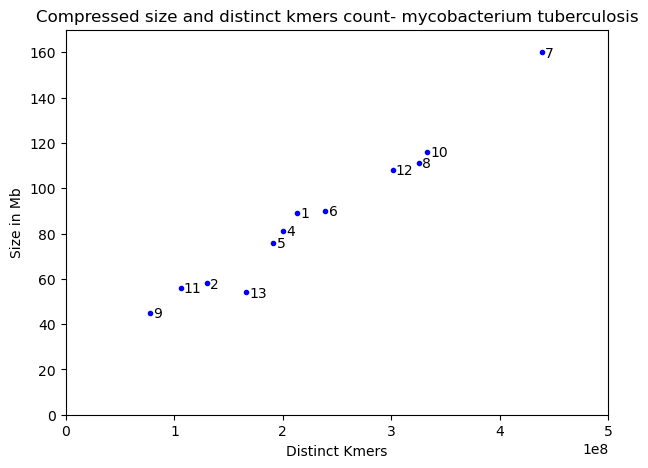

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))
x = df_batch_distinct_kmers['distinct_kmers'].values
y = data_tuber['size_Mb'].values

labels = range(1,14)
for i, txt in enumerate(labels):
    ax.annotate(f'{txt}', (x[i]+3000000, y[i]-2))

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- mycobacterium tuberculosis')
plt.xlim(0, 500000000)
plt.ylim(0, 170)
ax.scatter(x, y, marker='.', color = 'blue')